Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.

- Техника бутстрап применилась корректно, было проведено тщательное исследование и выбран правильный регион!
- Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту


# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
pip install phik

     |████████████████████████████████| 686 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install ydata-profiling

     |████████████████████████████████| 357 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 394 kB 66.9 MB/s eta 0:00:01
     |████████████████████████████████| 513 kB 82.8 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 76.5 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 72.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 69.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 73.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 61.8 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 88.2 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=558db6f779f73c63d7594fff7e89d3c262437d9500b6d8c50be19f198b42ce22
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uni

In [3]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 1.2 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import phik

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
#from sklearn.utils import shuffle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')

In [6]:
from ydata_profiling import ProfileReport

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Импорт ProfileReport
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>



Загрузим данные по каждому региону.

In [7]:
pth1 = 'geo_data_0.csv'
pth2 = '/datasets/geo_data_0.csv'

if os.path.exists(pth1):
    geo_data_0 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    geo_data_0 = pd.read_csv(pth2)
else:
    print('Something is wrong') 
    
    
display(geo_data_0.sample(10))
display(geo_data_0.describe())
geo_data_0.info()

id        f0        f1        f2     product
25739  OM3zi -0.600864  0.658205  4.491283  138.460803
91810  6iRRZ  1.633799 -0.108548 -4.940918   53.033934
81765  EuzQY  1.759401 -0.034474  7.640287  125.311357
9378   j9NiI  0.054264 -0.173732 -1.362256  112.931665
52009  OVH52  1.634412 -0.273389 -0.711127   67.709837
93315  zd6gp  0.094220  0.085447  2.743875  125.278834
59546  a7ceR  1.632083 -0.057588 -0.239172   32.175955
53546  eRoM1  1.986467  0.149686  2.245498  110.125259
18421  4a2pD  1.700307 -0.173487  1.454307  127.741266
7977   G0Ea9  0.885913 -0.473910  2.103745   84.342724

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
ProfileReport(geo_data_0, title='Регион 0')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
pth1 = 'geo_data_1.csv'
pth2 = '/datasets/geo_data_1.csv'

if os.path.exists(pth1):
    geo_data_1 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    geo_data_1 = pd.read_csv(pth2)
else:
    print('Something is wrong') 
    
    
display(geo_data_1.sample(10))
display(geo_data_1.describe())
geo_data_0.info()

id         f0         f1        f2     product
72398  qmVrN -15.962431  -9.345962 -0.006575    3.179103
78520  klPzA   1.867535  -8.343307  2.004360   57.085625
73373  3hhOv  -3.816526 -10.068925  3.995467  110.992147
21947  Skwhd  -5.087688  -0.307261  1.001398   30.132364
16751  36z1v  17.747642  -3.544263  0.998582   26.953261
39384  nDh2U  -1.699743  -7.715735  0.003710    3.179103
76606  6uY7L  20.817947  -3.782479  2.006110   53.906522
81066  1PRj9  -5.747183 -10.502639  4.995238  137.945408
39223  tjXLX   8.724499 -11.266755  1.996526   53.906522
66640  PTtJ4  -9.737739   0.447615  2.002844   57.085625

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
ProfileReport(geo_data_1, title='Регион 1')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pth1 = 'geo_data_2.csv'
pth2 = '/datasets/geo_data_2.csv'

if os.path.exists(pth1):
    geo_data_2 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    geo_data_2 = pd.read_csv(pth2)
else:
    print('Something is wrong') 
    
    
display(geo_data_2.sample(10))
display(geo_data_2.describe())
geo_data_0.info()

id        f0        f1        f2     product
62246  D8tlV  1.402643  1.764265  2.394645  135.231041
10485  JspY5  0.690971 -2.729271 -0.566520   57.136255
31489  hREm4 -1.168361 -2.901239  7.807845  142.756075
50622  wYUGo -0.603876  0.567809  2.103257   52.030615
16802  P5dKw  0.465546 -2.777435  0.368487  111.351216
26405  uZBt8  1.343793 -0.045747  8.621096   93.003728
84441  dITx6  2.714167  5.471202 -3.658500   37.352246
58721  1sVIM -0.285580  2.976642 -3.153626  113.181847
60770  6Y6fI -2.570657 -1.717592  3.488509  117.741612
21123  c7HXg -0.598715  1.189905  4.341945   11.988598

f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
ProfileReport(geo_data_2, title='Регион 2')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Пропусков в таблицах нет. Типы данных определны верно.

Проверим наличие дубликатов.

In [13]:
def check_columns(data_frame):
    print('Найдено явных дубликатов:', data_frame.duplicated().sum())
    print('Найдено дубликатов ID:', data_frame[data_frame.columns[0]].duplicated().sum())

In [14]:
print('Регион 0')
print()
check_columns(geo_data_0)
print('--------------------------------------')
print('Регион 1')
print()
check_columns(geo_data_1)
print('--------------------------------------')
print('Регион 2')
print()
check_columns(geo_data_2)
print('--------------------------------------')

Регион 0

Найдено явных дубликатов: 0
Найдено дубликатов ID: 10
--------------------------------------
Регион 1

Найдено явных дубликатов: 0
Найдено дубликатов ID: 4
--------------------------------------
Регион 2

Найдено явных дубликатов: 0
Найдено дубликатов ID: 4
--------------------------------------


<div class="alert alert-warning">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Скважены с одинаковым названием удалить?*
</div> 



<div class="alert alert-block alert-success">
<b>Успех:</b> Их не такое большое количество - а столбец id мы не используем, поэтому разницы большой нет - можем рассматривать их как разные точки.
</div>


Явные дубликаты отсутствуют. Совпаданий ID немного, поскольку ID не будем использовано в модели будем считать их как разные точки.

In [15]:
def product_null(df, target_name):
    null = df[df[target_name] == 0][target_name].count()
    print('Количество скважин с нулевым объёмом запасов =', null)
    display(df[df[target_name] == 0])

In [16]:
print('Регион 0')
print()
product_null(geo_data_0, 'product')
print('--------------------------------------')
print('Регион 1')
print()
product_null(geo_data_1, 'product')
print('--------------------------------------')
print('Регион 2')
print()
product_null(geo_data_2, 'product')
print('--------------------------------------')


Регион 0

Количество скважин с нулевым объёмом запасов = 1


id        f0        f1        f2  product
57263  zCM5W -0.702064  0.375992  0.236572      0.0

--------------------------------------
Регион 1

Количество скважин с нулевым объёмом запасов = 8235


id         f0         f1        f2  product
11     OXyvW  16.320755  -0.562946 -0.001783      0.0
13     igmai   6.695604  -0.749449 -0.007630      0.0
62     Qjy5w  21.418478  -5.134490 -0.002836      0.0
63     G6WCj   6.822701   3.104979 -0.000723      0.0
77     MzQhL   6.750150 -11.893512 -0.001601      0.0
...      ...        ...        ...       ...      ...
99936  YrRU8   5.085749  -3.980305  0.005063      0.0
99948  Jbnur   8.277805  -9.178818  0.003275      0.0
99956  aV1cJ  13.343983  -1.290200  0.005980      0.0
99961  Zjbn2  13.854163 -11.528089 -0.005556      0.0
99973  VsayB  12.698645  -4.384673 -0.002600      0.0

[8235 rows x 5 columns]

--------------------------------------
Регион 2

Количество скважин с нулевым объёмом запасов = 1


id        f0        f1        f2  product
68149  qeefd -0.865596 -1.615247 -4.126441      0.0

--------------------------------------


In [17]:
#product_null(geo_data_0, 'product')

In [18]:
#product_null(geo_data_1, 'product')

In [19]:
#product_null(geo_data_2, 'product')

В регионе 0 и 1 всего одна скважена с 0 запасом. Во втором регионе таких скважен заметно больше- 8235. Посмотрим как это отразится на модели.

Построим гистограммы по столбцу product.

In [20]:
def product_hist(df, bins):
    plt.figure(figsize=[12,9])
    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")
    plt.title("Гистограмма распределения по объему скважин")
    sns.histplot(df, x='product', bins=bins)
    plt.show()

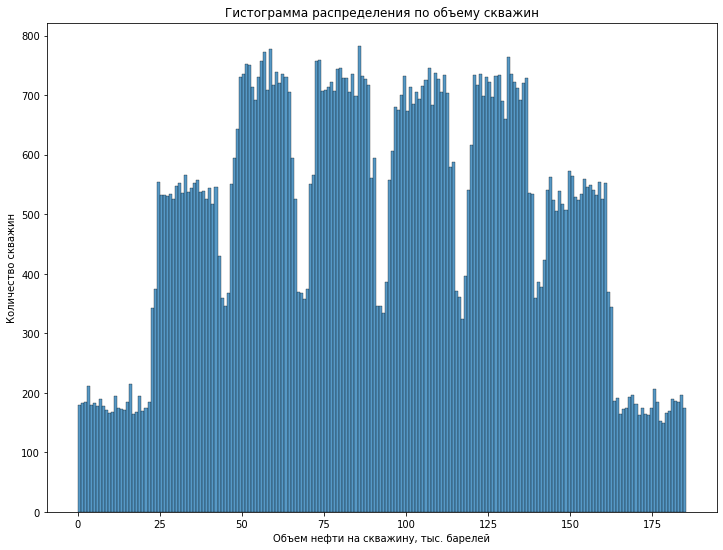

In [21]:
product_hist(geo_data_0, 200)

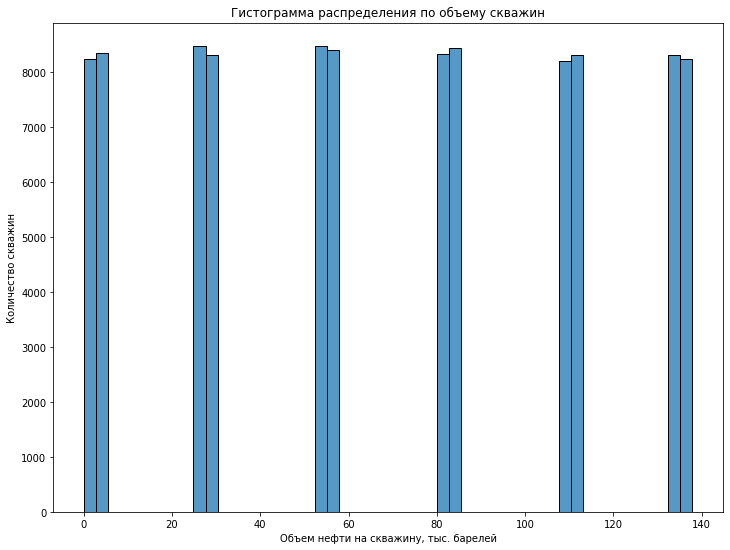

In [22]:
product_hist(geo_data_1, 50)

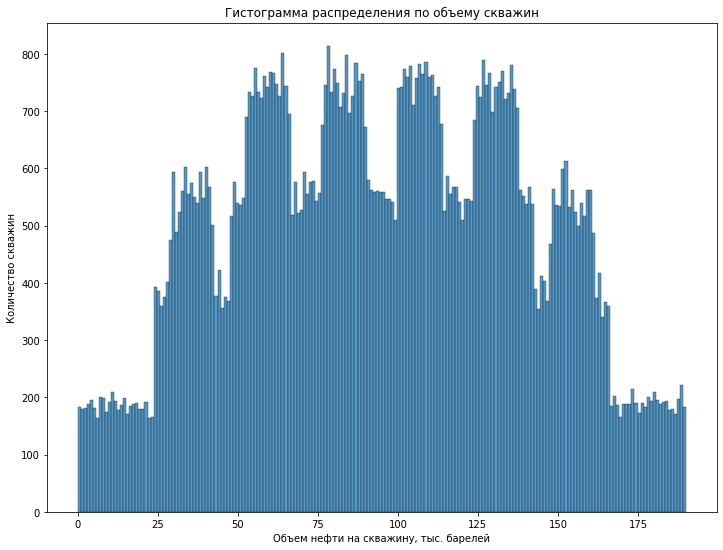

In [23]:
product_hist(geo_data_2, 200)

Размеры датасетов одинаковые.
Параметры f0, f1, f2 имеют разные минимумы, максимумы, средние. Необходимо будет привести к единому масштабу.

In [24]:
def product_hist(df):
    df_matrix = df.drop(['id'], axis=1).phik_matrix() 
    fig, ax = plt.subplots(figsize=(8, 8)) 
    sns.heatmap(df_matrix, annot=True, fmt='.2f', cmap='bwr').set(title='df');


interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


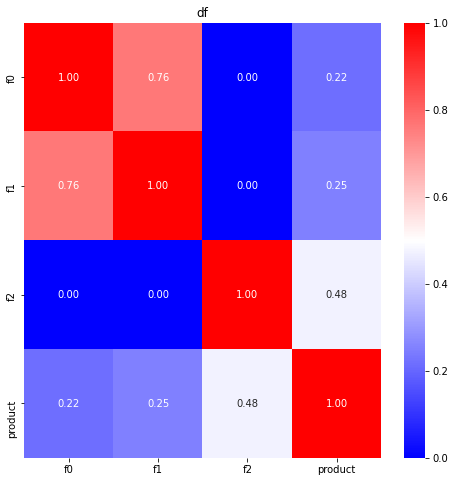

In [25]:
product_hist(geo_data_0)

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


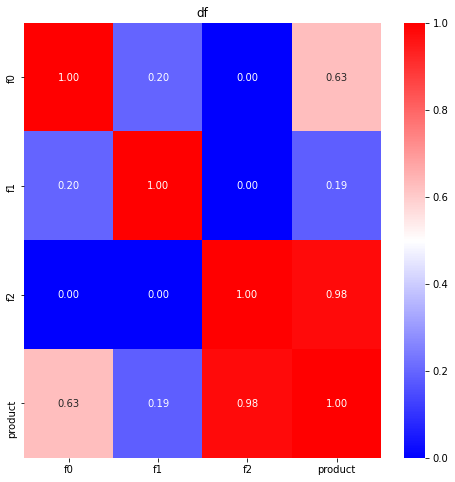

In [26]:
product_hist(geo_data_1)

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


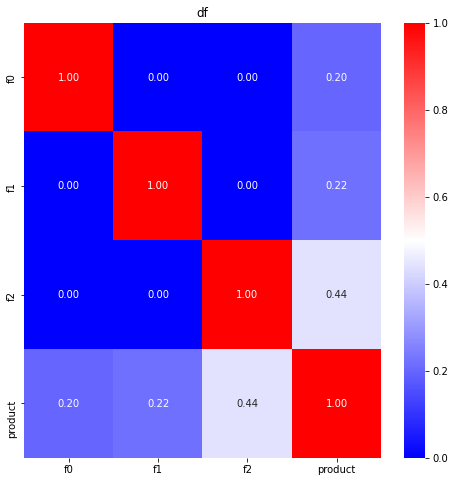

In [27]:
product_hist(geo_data_2)

* В регионе 0 корреляция между признаками f0 и f1, и умеренна корреляция между целевым признаком product признаком f2.
* В регионе 1 корреляция у целевого признака product  и признака f2 высокая корреляция, и умеренная с f0.
* В регионе 2 целевой признак product слабо коррелирует с f2.

Название скважины не помогает обучению модели. Устаговим ID индексами.

In [28]:
geo_data_0 = geo_data_0.set_index('id')
geo_data_1 = geo_data_1.set_index('id')
geo_data_2 = geo_data_2.set_index('id')

**Вывод**

Данные готовы к обучению.

Во втором месторождении около 8,2% месторождений не имело значения в столбце product. Возможно были утеряны данные или не было исследовано количество барелей нефти.

У первого и третьего региона наспределение скважин близкое к нормальному. Во втором регионе данные имеют странное неравномерное распределение: от 0 до 5 баррелей с шагом по 15-20.





<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо, особенно радует, что изучены корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>




<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Оценила EDA при помощи ProfileReport 🤩, но удалять код не стала.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Главное во время обучения не злоупотреблять, чтобы руки не забыл как делать EDA анализ)
</div>

## Обучение и проверка модели

In [29]:
target = ['product']
col_names = ['f0', 'f1', 'f2']
#df = ['geo_data_0', 'geo_data_1', 'geo_data_2']

In [30]:
RANDOM_STATE=12345

In [31]:
def df_split(df):
    features = df.drop(['product'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=RANDOM_STATE)
    return features_train, target_train, features_valid, target_valid

In [32]:
features_train_0, target_train_0, features_valid_0, target_valid_0 = df_split(geo_data_0)
features_train_1, target_train_1, features_valid_1, target_valid_1 = df_split(geo_data_1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = df_split(geo_data_2)

Проверим как разделены данные.

In [33]:
print('Регион 0')
print()
print(f'Обучающие данные:{features_train_0.shape[0]}\nВалидационные: {features_valid_0.shape[0]}')
print('--------------------------------------')
print('Регион 1')
print()
print(f'Обучающие данные:{features_train_1.shape[0]}\nВалидационные: {features_valid_1.shape[0]}')
print('--------------------------------------')
print('Регион 2')
print()
print(f'Обучающие данные:{features_train_2.shape[0]}\nВалидационные: {features_valid_2.shape[0]}')
print('--------------------------------------')

Регион 0

Обучающие данные:75000
Валидационные: 25000
--------------------------------------
Регион 1

Обучающие данные:75000
Валидационные: 25000
--------------------------------------
Регион 2

Обучающие данные:75000
Валидационные: 25000
--------------------------------------


Cоздаём общий пайплайн для подготовки данных

In [34]:
data_preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), col_names)
    ], 
    remainder='passthrough'
)

Cоздаём итоговый пайплайн: подготовка данных и модель

In [35]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [36]:
param_grid = [
    # словарь для модели LinearRegression() 
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }]

In [37]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring=mean_squared_error
)

In [38]:
def fitting(features_train, target_train, features_valid, target_valid): # обучаем модель
    grid_search.fit(features_train, target_train)
    return pd.Series(grid_search.predict(features_valid)), target_valid

In [39]:
predicted_0, target_0 = fitting(features_train_0, target_train_0, features_valid_0, target_valid_0)
predicted_1, target_1 = fitting(features_train_1, target_train_1, features_valid_1, target_valid_1)
predicted_2, target_2 = fitting(features_train_2, target_train_2, features_valid_2, target_valid_2)

Предсказания и правильные ответы сохранены, теперь выведем средний запас предсказанного сырья и RMSE модели.

In [40]:
def results(answers, predictions):
    mse = mean_squared_error(answers, predictions)
    print("Средний запас предсказанного сырья =", '%.2f' % predictions.mean(), 'тыс. баррелей')
    print("RMSE модели линейной регрессии =", '%.2f' % mse ** 0.5)

In [41]:
print('Регион 0')
print()
results(target_0, predicted_0)
print('--------------------------------------')
print('Регион 1')
print()
results(target_1, predicted_1)
print('--------------------------------------')
print('Регион 2')
print()
results(target_2, predicted_2)
print('--------------------------------------')


Регион 0

Средний запас предсказанного сырья = 92.59 тыс. баррелей
RMSE модели линейной регрессии = 37.58
--------------------------------------
Регион 1

Средний запас предсказанного сырья = 68.73 тыс. баррелей
RMSE модели линейной регрессии = 0.89
--------------------------------------
Регион 2

Средний запас предсказанного сырья = 94.97 тыс. баррелей
RMSE модели линейной регрессии = 40.03
--------------------------------------


**Вывод**

Таким образом, мы обучили модель линейной регрессии на полученных данных и сделали предсказания на валидационной выборке. Качество предсказания высоко в 1 регионе, так как там метрика RMSE показывает наилучший результат. Средний запас сырья больше в регионах 0 и 3, но и показатель ошибки там достаточно высокий.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 


## Подготовка к расчёту прибыли

Расчеты будем проводить в соотвествии со следующими условиями:
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [42]:
BUDGET = 10e9
WELLS_EXPLORE= 500        
WELLS_CHOSEN = 200 
PRICE_PER_BARREL = 450e3

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    

Расчитаем безубыточную разработку сырья на 200 точек. И найдем среднее количество продукта в месторождениях необходимое для этого.

In [43]:
average_profit_per_well = BUDGET/WELLS_CHOSEN
print("Средняя прибыль на лучшую скважену =", '%.2f' % average_profit_per_well, 'руб.')

average_barrels_per_well = average_profit_per_well / PRICE_PER_BARREL
print("Средний объем нефти на скважену =", '%.2f' % average_barrels_per_well, 'тыс.бар.')

Средняя прибыль на лучшую скважену = 50000000.00 руб.
Средний объем нефти на скважену = 111.11 тыс.бар.


**Вывод**

Получилось, что для безубыточной добычи топлива необходимо чтобы каждая скважина в среднем содержала не менее 111.11 тыс. баррелей. 
Согласно нашим предыдущим расчетам, средний запас сырья в исследуемых регионах 92, 69 и 95 тыс. баррелей соответственно, что ниже необходимого порога. Получается, что средних значений по запасам не достаточно для разработки, а это значит, что нужно искать лучшие места для разработки. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


## Расчёт прибыли и рисков 

Применим технику Bootstrap для дальнейших расчетов.

In [44]:
STATE = np.random.RandomState(12345)
BOOTSTRAP_SAMPLES = 1000

In [45]:
def revenue(target, probabilities, count):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return ((PRICE_PER_BARREL * selected.sum() - BUDGET)/1e6) 


<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>

In [46]:
print("Прибыль региона 0 =", '%.2f' % revenue(target_0, predicted_0, wells_chosen),'млн. руб.')
print("Прибыль региона 1 =", '%.2f' % revenue(target_1, predicted_1, wells_chosen), 'млн. руб.')
print("Прибыль региона 2 =", '%.2f' % revenue(target_2, predicted_2, wells_chosen), 'млн. руб.')

NameError: name 'wells_chosen' is not defined

In [ ]:
def bootstrap (target, predictions):
    values = []
    for i in range(BOOTSTRAP_SAMPLES):
        target_subsample = target.reset_index(drop=True).sample(n=WELLS_EXPLORE, replace=True, random_state=STATE)
        probs_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, WELLS_CHOSEN))

    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
   
    print("Средняя прибыль по региону  =", '%.2f' % mean, 'млн.руб.')
    print("Доверительный интервал, минимум =", '%.2f' % lower, 'млн.руб.')
    print("Доверительный интервал, максимум =", '%.2f' % upper, 'млн.руб.')
    print("Вероятность убытков =", '%.2f' % ((values < 0).mean()*100), '%')


<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке (сэмплирование происходит с возвращением), метрики считаются верным образом!  
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Не понятно, зачем два раза считать квантили 
</div>  

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправлено.
</div>



<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>


In [ ]:
print('Регион 0')
print()
bootstrap(target_0, predicted_0)
print('--------------------------------------')
print('Регион 1')
print()
bootstrap(target_1, predicted_1)
print('--------------------------------------')
print('Регион 2')
print()
bootstrap(target_2, predicted_2)
print('--------------------------------------')


**Вывод**

Данные были обработаны и рассчитаны прибыль, интервал и вероятность убытков.

Вероятность убытков ниже 2.5% только во втором регионе, следовательно по условиям подходит только он. Так же в этом регионе выше средняя прибыль с 200 лучших из случайных 500. Кроме того, доверительный интервал показывает окупаемость даже при не очень удачном выборе скважин.


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>



<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Спасибо! 👍
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 🤝
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован